In [1]:
import matplotlib.pyplot as plt

In [2]:
def lzw_compress(sequence):
    dictionary = {str(i): i for i in range(256)}  # Start with numeric string keys
    dict_size = 256
    w = ""
    compressed_data = []

    print("\n--- INITIAL DICTIONARY (0–255) ---")
    for k, v in list(dictionary.items())[:20]:
        print(f"{k} : {v}")
    print("...(256 initial entries)...\n")

    print("\nDICTIONARY UPDATES DURING COMPRESSION")

    for c in sequence:
        wc = w + " " + c if w else c  # Add space only between tokens
        if wc in dictionary:
            w = wc
        else:
            compressed_data.append(dictionary[w])
            dictionary[wc] = dict_size
            print(f"Added: '{wc}' → {dict_size}")
            dict_size += 1
            w = c

    if w:
        compressed_data.append(dictionary[w])

    print("\nFINAL DICTIONARY CONTENTS")
    for key, value in dictionary.items():
        print(f"{key} : {value}")

    return compressed_data

In [3]:
def lzw_decompress(compressed_data):
    dictionary = {i: str(i) for i in range(256)}
    dict_size = 256

    w = dictionary[compressed_data.pop(0)]
    decompressed_data = [w]

    for k in compressed_data:
        if k in dictionary:
            entry = dictionary[k]
        elif k == dict_size:
            entry = w + " " + w.split(" ")[0]
        else:
            raise ValueError("Bad compressed k: %s" % k)

        decompressed_data.append(entry)
        dictionary[dict_size] = w + " " + entry.split(" ")[0]
        dict_size += 1
        w = entry

    return " ".join(decompressed_data)

Enter numeric sensor readings separated by spaces:  1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 6 7 8 9 6 7 8 9



--- INITIAL DICTIONARY (0–255) ---
0 : 0
1 : 1
2 : 2
3 : 3
4 : 4
5 : 5
6 : 6
7 : 7
8 : 8
9 : 9
10 : 10
11 : 11
12 : 12
13 : 13
14 : 14
15 : 15
16 : 16
17 : 17
18 : 18
19 : 19
...(256 initial entries)...


DICTIONARY UPDATES DURING COMPRESSION
Added: '1 2' → 256
Added: '2 3' → 257
Added: '3 4' → 258
Added: '4 5' → 259
Added: '5 1' → 260
Added: '1 2 3' → 261
Added: '3 4 5' → 262
Added: '5 1 2' → 263
Added: '2 3 4' → 264
Added: '4 5 6' → 265
Added: '6 7' → 266
Added: '7 8' → 267
Added: '8 9' → 268
Added: '9 6' → 269
Added: '6 7 8' → 270

FINAL DICTIONARY CONTENTS
0 : 0
1 : 1
2 : 2
3 : 3
4 : 4
5 : 5
6 : 6
7 : 7
8 : 8
9 : 9
10 : 10
11 : 11
12 : 12
13 : 13
14 : 14
15 : 15
16 : 16
17 : 17
18 : 18
19 : 19
20 : 20
21 : 21
22 : 22
23 : 23
24 : 24
25 : 25
26 : 26
27 : 27
28 : 28
29 : 29
30 : 30
31 : 31
32 : 32
33 : 33
34 : 34
35 : 35
36 : 36
37 : 37
38 : 38
39 : 39
40 : 40
41 : 41
42 : 42
43 : 43
44 : 44
45 : 45
46 : 46
47 : 47
48 : 48
49 : 49
50 : 50
51 : 51
52 : 52
53 : 53
54 : 54
55 : 55
56 :

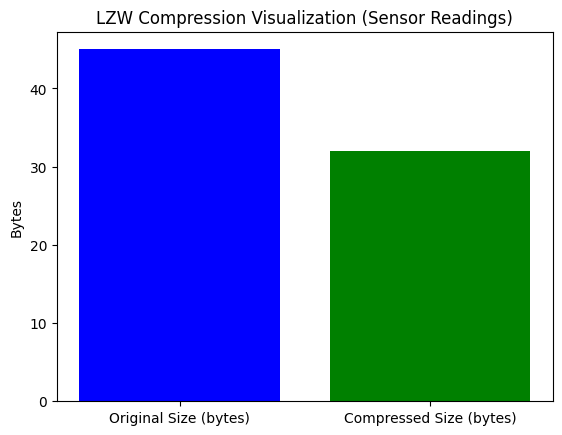

In [4]:
def main():
    sequence = input("Enter numeric sensor readings separated by spaces: ").split()

    compressed = lzw_compress(sequence)

    decompressed = lzw_decompress(compressed.copy())

    # --- Byte Calculations ---
    original_bytes = len(" ".join(sequence).encode('utf-8'))
    compressed_bytes = len(compressed) * 2  # approx. 2 bytes per code

    compression_ratio = original_bytes / compressed_bytes

    print("\n--- RESULTS (Manual LZW for Sensor Readings) ---")
    print("Original Sequence:", " ".join(sequence))
    print("Compressed Data:", compressed)
    print("Decompressed Sequence:", decompressed)
    print(f"Original Bytes: {original_bytes} bytes")
    print(f"Compressed Bytes: {compressed_bytes} bytes")
    print(f"Compression Ratio: {compression_ratio:.2f}")

    # --- Visualization ---
    labels = ['Original Size (bytes)', 'Compressed Size (bytes)']
    sizes = [original_bytes, compressed_bytes]

    plt.bar(labels, sizes, color=['blue', 'green'])
    plt.title('LZW Compression Visualization (Sensor Readings)')
    plt.ylabel('Bytes')
    plt.show()


if __name__ == "__main__":
    main()